In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from datetime import date

In [2]:
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

In [3]:
# Pull Data Into DF
m_table = pd.read_html(url)
m_df = m_table[0]
m_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [4]:
# Check dtypes
m_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [5]:
# Convert date to datetime64
m_df["terrestrial_date"] = pd.to_datetime(m_df["terrestrial_date"])
m_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [6]:
# How many months exist on Mars?
len(m_df["month"].unique())

12

In [7]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset? 

len(m_df["sol"].unique())

1867

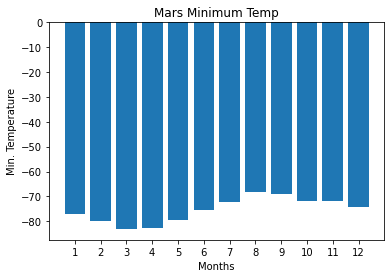

In [8]:

# Which month, on average, has the lowest temperature? The highest?
temp = m_df.groupby("month").mean()

months = np.arange(1, 13, 1)

x = months
y = temp["min_temp"]

plt.bar(x, y)
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Min. Temperature")
plt.title("Mars Minimum Temp")
plt.show()

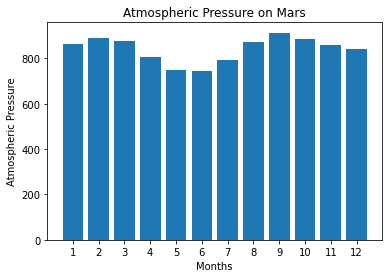

In [9]:
#Which month, on average, has the lowest atmospheric pressure? The highest?
months = np.arange(1, 13, 1)

pressure = m_df.groupby("month").mean()

x = months
y = pressure["pressure"]

plt.bar(x, y)
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Atmospheric Pressure")
plt.title("Atmospheric Pressure on Mars")
plt.show()

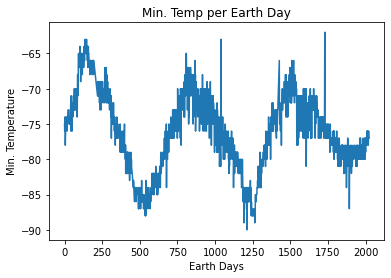

In [40]:
# How many terrestrial days exist in a Martian year?

m_df['min_date']= m_df["terrestrial_date"].min()
m_df['max_date']= m_df["terrestrial_date"].max()
m_df['earth_days'] = m_df["terrestrial_date"] - m_df['min_date']
m_df['earth_days'] = m_df['earth_days'].dt.days.astype('int16')

x = m_df['earth_days']
y = m_df['min_temp']

plt.plot(x,y)
plt.ylabel("Min. Temperature")
plt.xlabel("Earth Days")
plt.title("Min. Temp per Earth Day")
plt.show()

In [41]:
# Save DataFrame to a CSV file
m_df.to_csv('Mars_Weather_Data.csv', index=False)